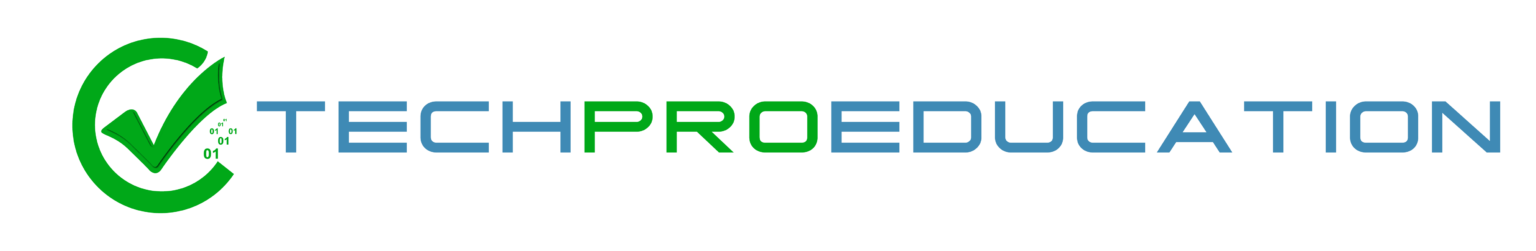

# Hand Written Digits Project

Data reference link : https://archive.ics.uci.edu/ml/datasets/Pen-Based+Recognition+of+Handwritten+Digits

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px


%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 6



from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate


from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import log_loss, recall_score, accuracy_score, precision_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, plot_confusion_matrix

from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc
from sklearn.metrics import roc_curve, average_precision_score, precision_recall_curve

from sklearn.svm import SVC


import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

In [2]:
df = pd.read_csv("pendigits.csv")
df.head()

,input1,input2,input3,input4,input5,input6,input7,input8,input9,input10,input11,input12,input13,input14,input15,input16,class
0,47,100,27,81,57,37,26,0,0,23,56,53,100,90,40,98,8
1,0,89,27,100,42,75,29,45,15,15,37,0,69,2,100,6,2
2,0,57,31,68,72,90,100,100,76,75,50,51,28,25,16,0,1
3,0,100,7,92,5,68,19,45,86,34,100,45,74,23,67,0,4
4,0,67,49,83,100,100,81,80,60,60,40,40,33,20,47,0,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10992 entries, 0 to 10991
Data columns (total 17 columns):
 #   Column   Non-Null Count  Dtype
---  ------   --------------  -----
 0   input1   10992 non-null  int64
 1   input2   10992 non-null  int64
 2   input3   10992 non-null  int64
 3   input4   10992 non-null  int64
 4   input5   10992 non-null  int64
 5   input6   10992 non-null  int64
 6   input7   10992 non-null  int64
 7   input8   10992 non-null  int64
 8   input9   10992 non-null  int64
 9   input10  10992 non-null  int64
 10  input11  10992 non-null  int64
 11  input12  10992 non-null  int64
 12  input13  10992 non-null  int64
 13  input14  10992 non-null  int64
 14  input15  10992 non-null  int64
 15  input16  10992 non-null  int64
 16  class    10992 non-null  int64
dtypes: int64(17)
memory usage: 1.4 MB


In [4]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
input1,10992.0,38.814320,34.257783,0.0,6.0,32.0,65.0,100.0
input2,10992.0,85.120269,16.218571,0.0,76.0,89.0,100.0,100.0
input3,10992.0,40.605622,26.342984,0.0,20.0,40.0,58.0,100.0
input4,10992.0,83.774199,19.163646,0.0,72.0,91.0,100.0,100.0
input5,10992.0,49.770378,34.100515,0.0,18.0,53.0,78.0,100.0
input6,10992.0,65.573144,26.996688,0.0,49.0,71.0,86.0,100.0
input7,10992.0,51.220251,30.576881,0.0,28.0,53.5,74.0,100.0
input8,10992.0,44.498999,29.906104,0.0,23.0,43.0,64.0,100.0
input9,10992.0,56.868541,34.135530,0.0,29.0,60.0,89.0,100.0
input10,10992.0,33.695961,27.251548,0.0,7.0,33.0,54.0,100.0


In [5]:
def missing_values(df):
    missing_number = df.isnull().sum().sort_values(ascending = False)
    missing_percent = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
    missing_values = pd.concat([missing_number, missing_percent], axis = 1, keys = ['Missing_Number', 'Missing_Percent'])
    return missing_values[missing_values['Missing_Number'] > 0]

missing_values(df)

,Missing_Number,Missing_Percent


In [6]:
df.duplicated().sum()

0

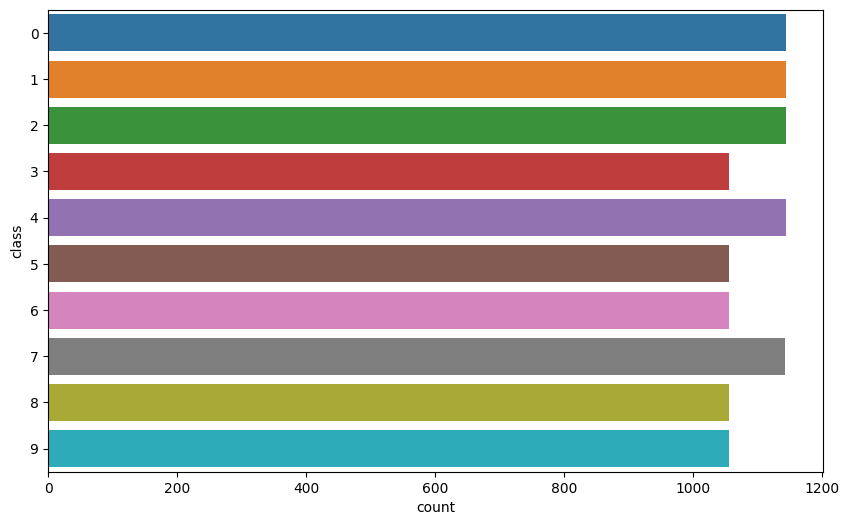

In [7]:
sns.countplot(y = df["class"]);

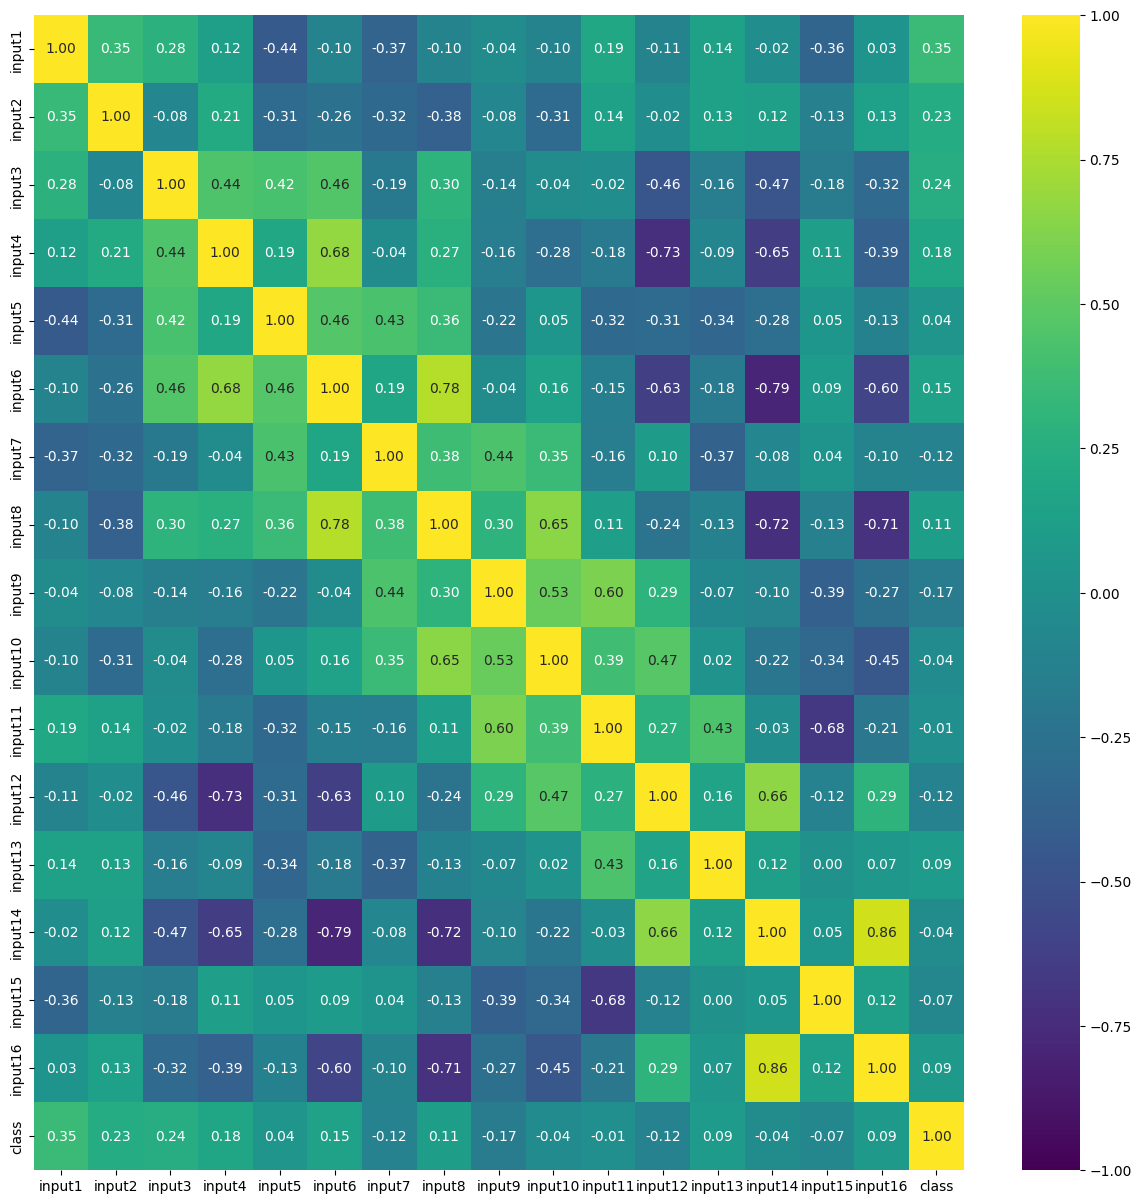

In [8]:
plt.figure(figsize = (15,15))
sns.heatmap(df.corr(),vmin=-1,vmax=1, annot=True, fmt='.2f', cmap='viridis');

<Figure size 1000x600 with 0 Axes>

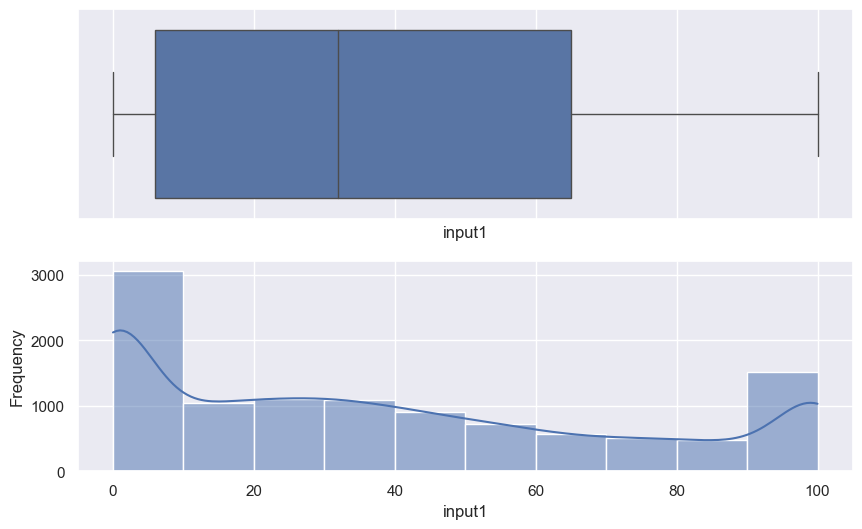

<Figure size 1000x600 with 0 Axes>

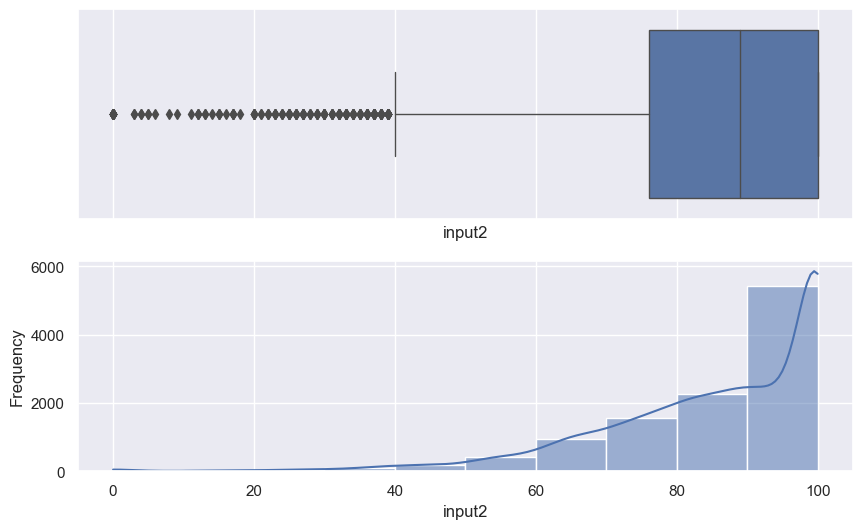

<Figure size 1000x600 with 0 Axes>

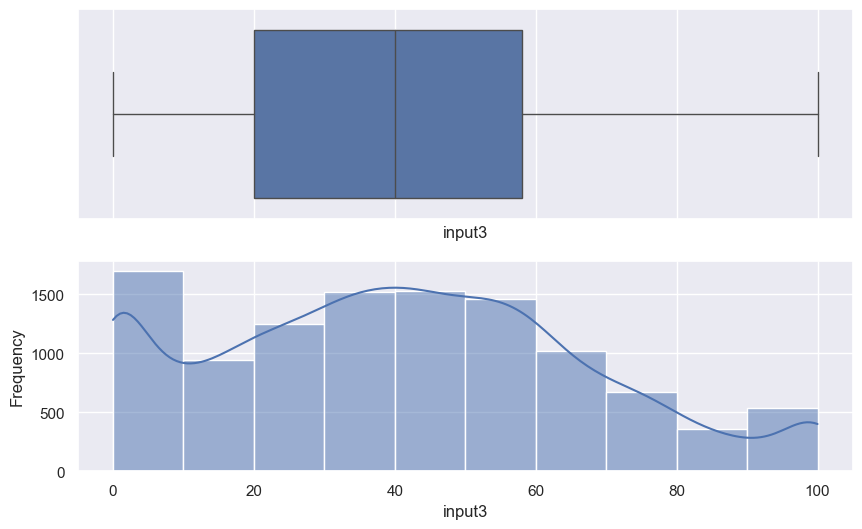

<Figure size 1000x600 with 0 Axes>

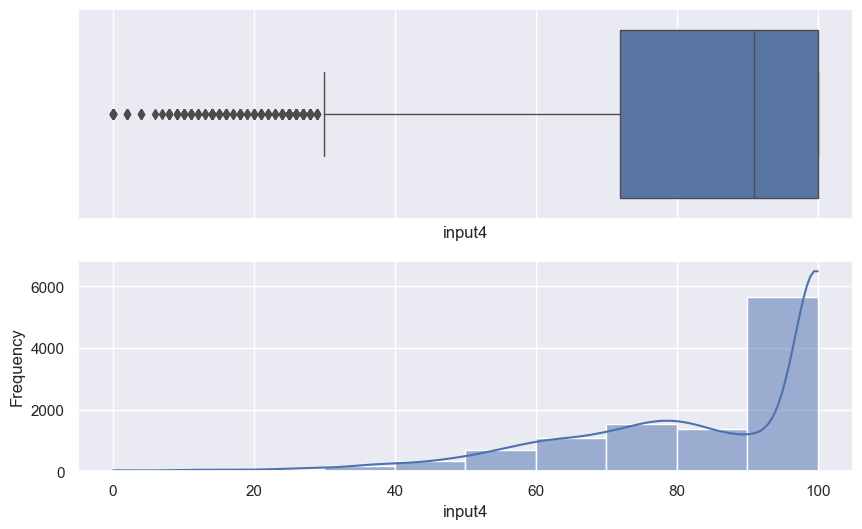

<Figure size 1000x600 with 0 Axes>

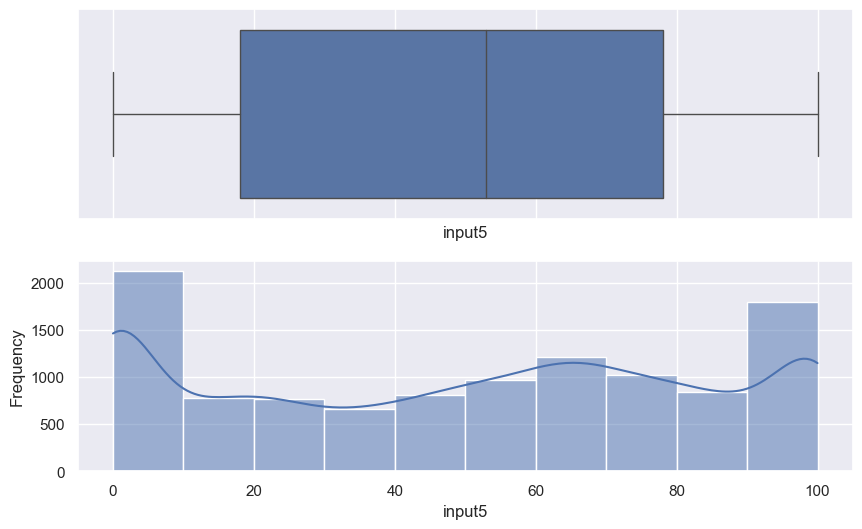

<Figure size 1000x600 with 0 Axes>

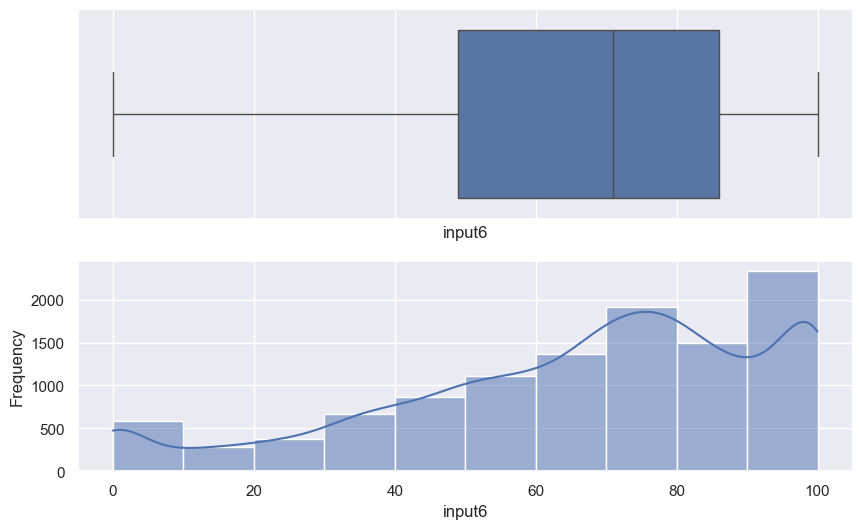

<Figure size 1000x600 with 0 Axes>

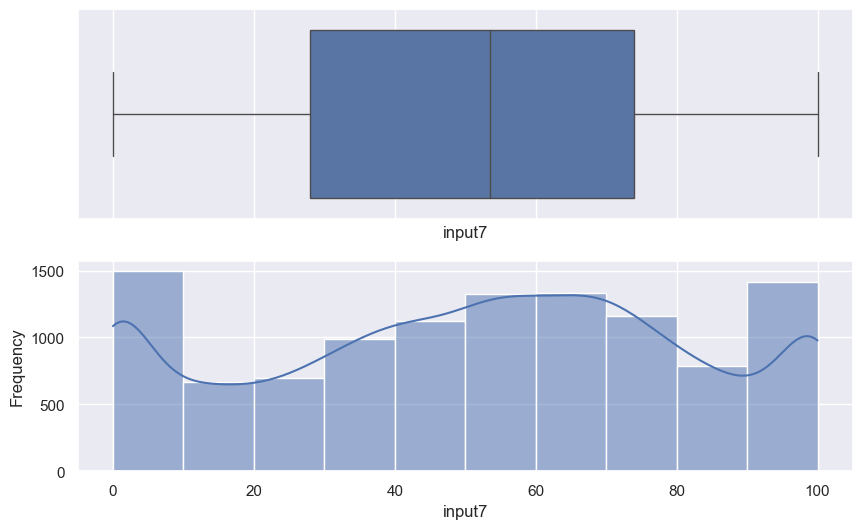

<Figure size 1000x600 with 0 Axes>

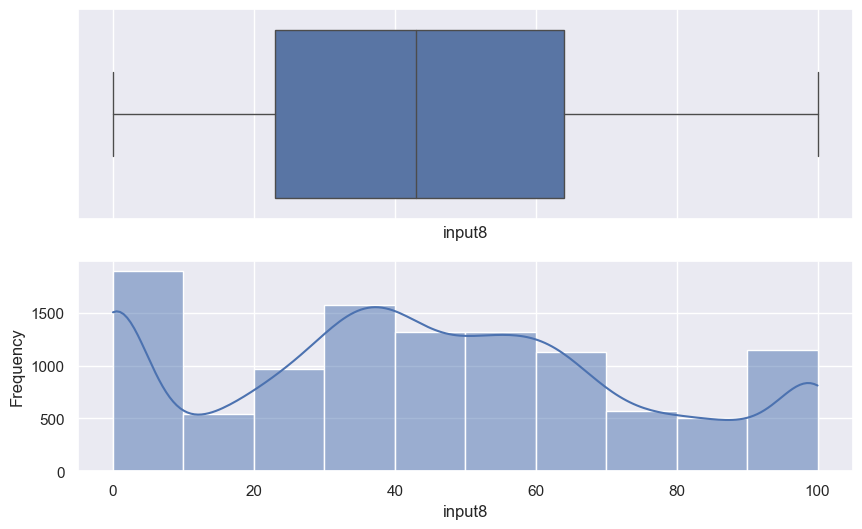

<Figure size 1000x600 with 0 Axes>

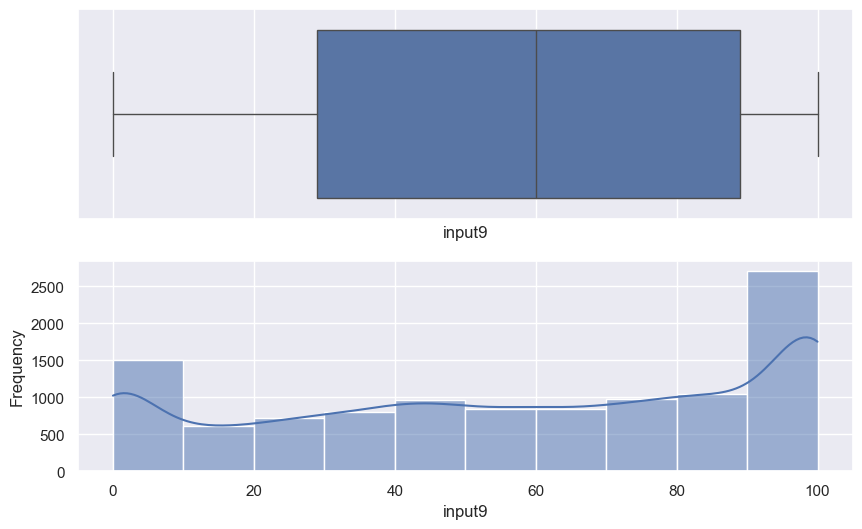

<Figure size 1000x600 with 0 Axes>

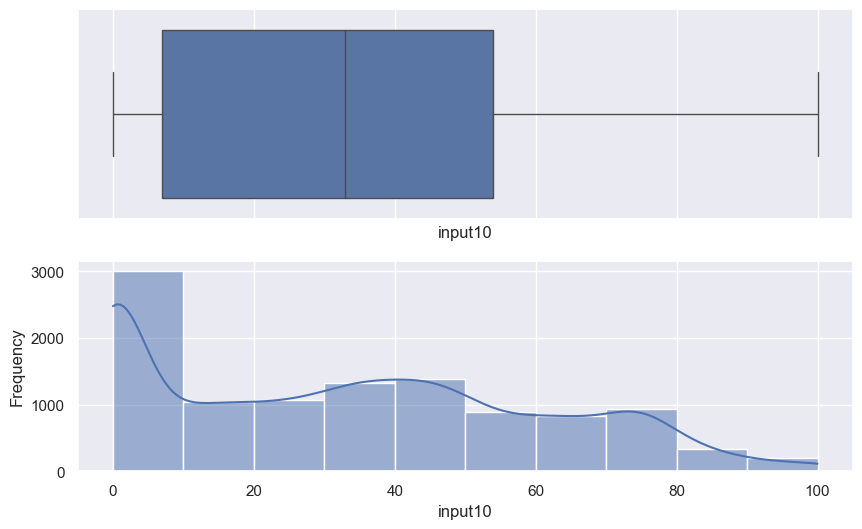

<Figure size 1000x600 with 0 Axes>

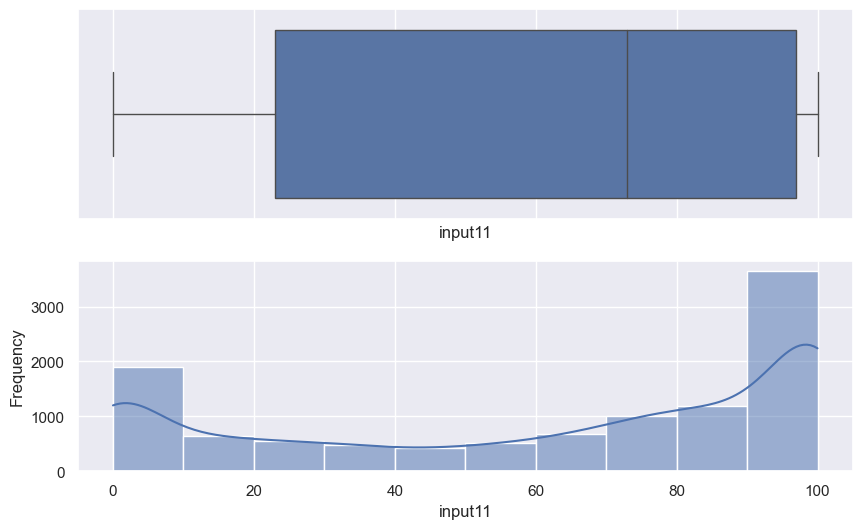

<Figure size 1000x600 with 0 Axes>

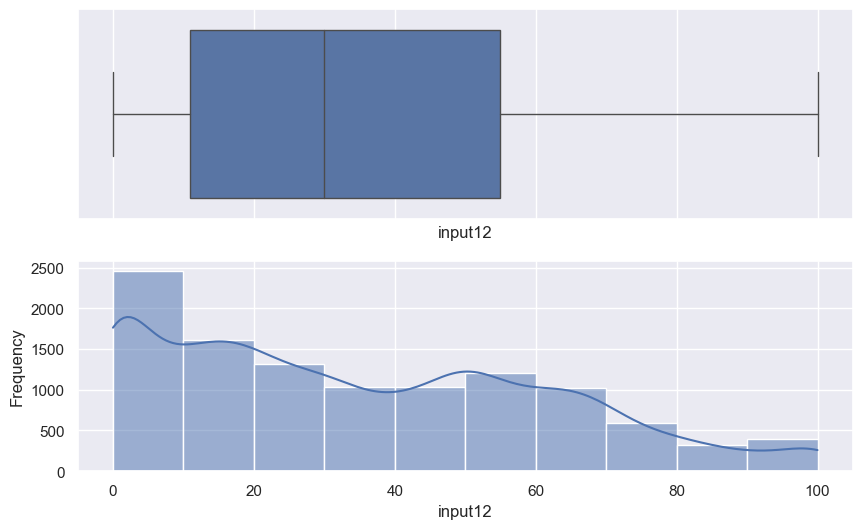

<Figure size 1000x600 with 0 Axes>

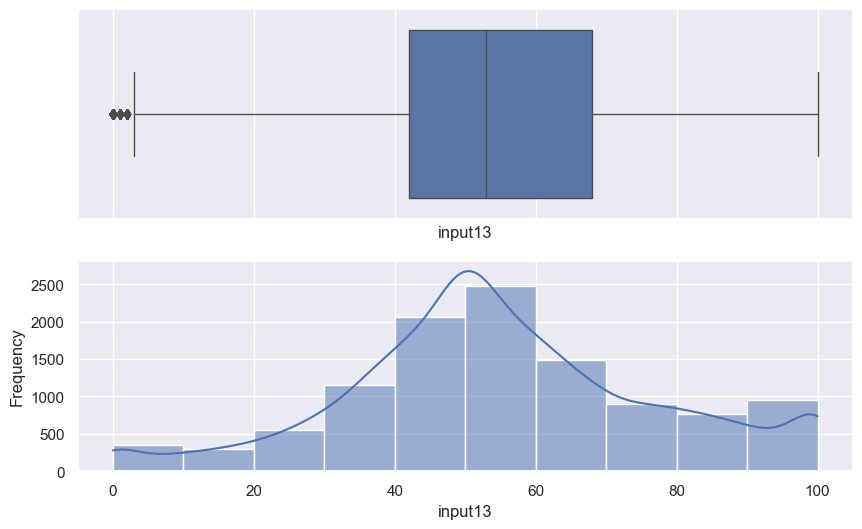

<Figure size 1000x600 with 0 Axes>

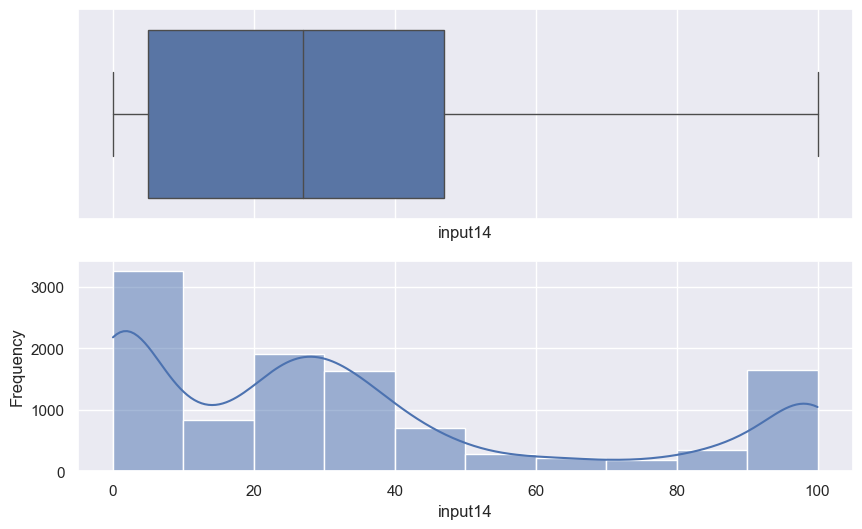

<Figure size 1000x600 with 0 Axes>

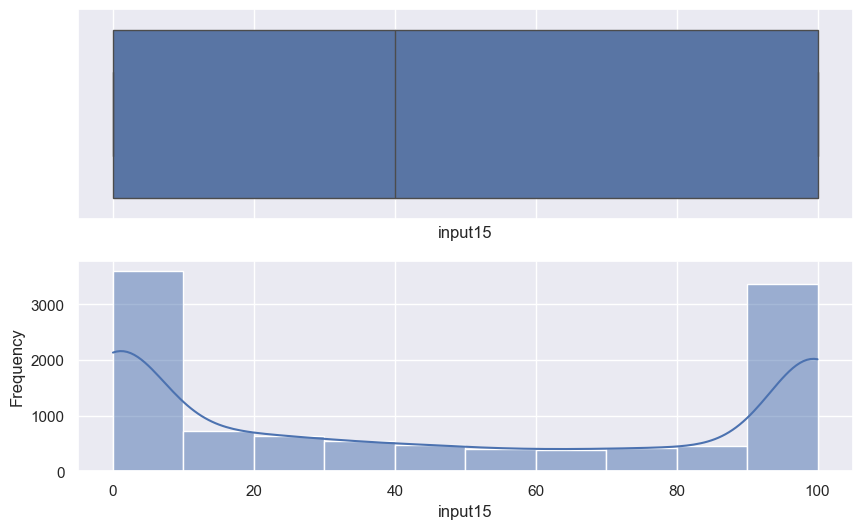

<Figure size 1000x600 with 0 Axes>

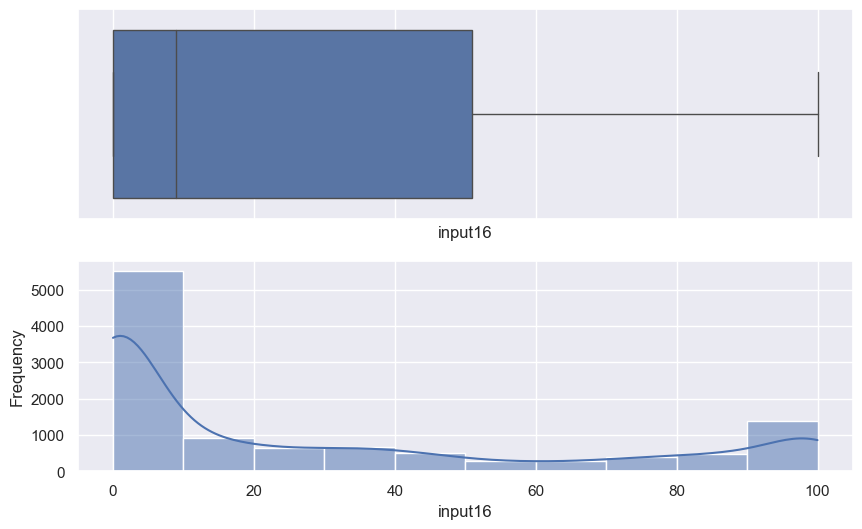

<Figure size 1000x600 with 0 Axes>

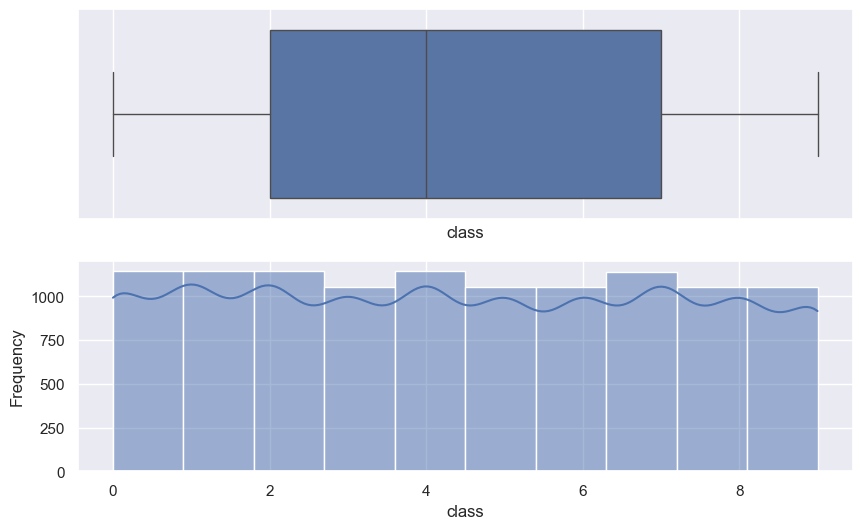

In [9]:

# a for loop to show all features --------------
for i in df.columns:
    plt.figure()
    plt.tight_layout()
    sns.set(rc={"figure.figsize":(10, 6)})
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True)
    plt.gca().set(xlabel= i,ylabel='Frequency')
    sns.boxplot(df[i], ax=ax_box , linewidth= 1.0)
    sns.histplot(df[i], ax=ax_hist , bins = 10,kde=True);

## Test Splitting

In [10]:
X = df.drop('class', axis = 1)
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

# Random Forest Classifier

In [12]:
from sklearn.metrics import confusion_matrix,classification_report,plot_confusion_matrix

def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print("Report of Test Set")
    print(classification_report(y_test, y_pred))
    print()
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print("Report of Train Set")
    print(classification_report(y_train, y_train_pred))

In [13]:
rf_model = RandomForestClassifier(class_weight = "balanced", random_state=101)

In [14]:
rf_model.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=101)

In [15]:
eval_metric(rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 320   8   2   0   0   0   0   0   1]
 [  0   2 344   0   0   0   0   3   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 356   0   0   1   0   0]
 [  0   0   0   3   0 318   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   1   0   1   0   0   0 336   0   0]
 [  1   0   0   0   0   1   0   2 301   0]
 [  0   0   0   0   0   0   0   0   0 303]]
Report of Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.99      0.97      0.98       331
           2       0.97      0.99      0.98       349
           3       0.98      0.99      0.99       309
           4       0.99      1.00      1.00       357
           5       1.00      0.99      0.99       321
           6       1.00      1.00      1.00       334
           7       0.98      0.99      0.99       338
           8       1.00      0.99      0.99       305


## Cross Validate

In [16]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)

scores = cross_validate(model, X_train, y_train, scoring = ["accuracy", "precision_micro", "recall_micro", "f1_micro"], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy           0.989084
test_precision_micro    0.989084
test_recall_micro       0.989084
test_f1_micro           0.989084
dtype: float64

In [17]:
rf_feature_imp = pd.DataFrame(index = X.columns, data = rf_model.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
rf_feature_imp

,Feature Importance
input16,0.107581
input14,0.098432
input10,0.074874
input15,0.074577
input11,0.074383
input5,0.070518
input8,0.063034
input1,0.062394
input9,0.062235
input12,0.055469


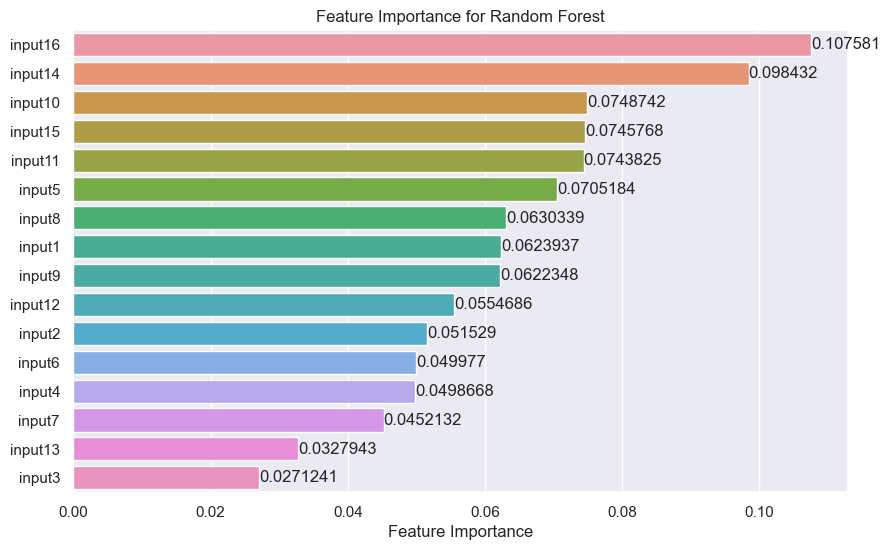

In [18]:
ax = sns.barplot(x=rf_feature_imp["Feature Importance"], y=rf_feature_imp.index)
plt.title("Feature Importance for Random Forest")
ax.bar_label(ax.containers[0])
plt.show()

## Grid Search

In [19]:
param_grid_rf = {'n_estimators':[50, 64, 100, 128, 300],
             'max_features':[2, 3, 4, "auto"],
             'max_depth':[3, 5, 7, 9],
             'min_samples_split':[2, 5, 8]}

In [20]:
model = RandomForestClassifier(class_weight = "balanced", random_state=101)
rf_grid_model = GridSearchCV(model, param_grid_rf, scoring = "accuracy", n_jobs = -1, verbose = 2).fit(X_train, y_train)

Fitting 5 folds for each of 240 candidates, totalling 1200 fits


In [21]:
rf_grid_model.best_params_

{'max_depth': 9,
 'max_features': 4,
 'min_samples_split': 2,
 'n_estimators': 300}

In [22]:
score_rf = rf_grid_model.best_score_
score_rf

0.9821937809412999

In [23]:
eval_metric(rf_grid_model, X_train, y_train, X_test, y_test)

Test_Set
[[350   0   0   0   1   0   0   0   0   0]
 [  0 305  19   7   0   0   0   0   0   0]
 [  0   6 341   0   0   0   0   2   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   1   0   1]
 [  0   0   0   5   0 316   0   0   0   0]
 [  0   0   0   0   1   0 333   0   0   0]
 [  0   2   0   0   0   0   0 335   1   0]
 [  0   0   0   0   0   1   0   1 303   0]
 [  0   0   0   0   1   0   0   0   0 302]]
Report of Test Set
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       351
           1       0.97      0.92      0.95       331
           2       0.94      0.98      0.96       349
           3       0.96      0.99      0.98       309
           4       0.99      0.99      0.99       357
           5       1.00      0.98      0.99       321
           6       1.00      1.00      1.00       334
           7       0.99      0.99      0.99       338
           8       1.00      0.99      1.00       305


Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits
Fitting 5 folds for each of 240 candidates, totalling 1200 fits


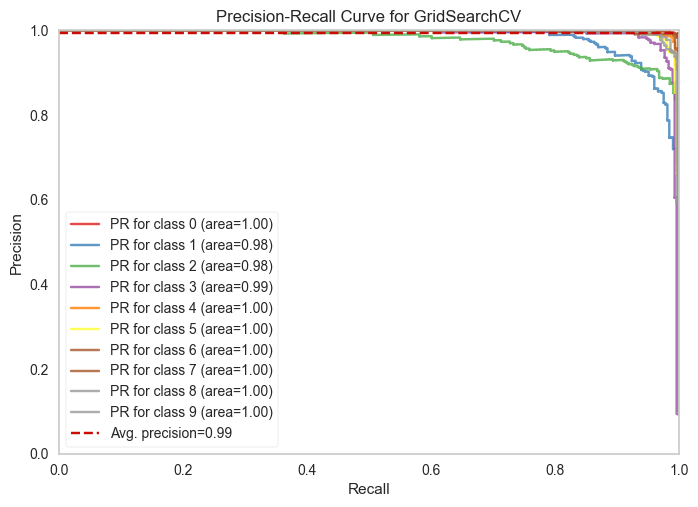

In [24]:
from yellowbrick.classifier import PrecisionRecallCurve
model = rf_grid_model
viz = PrecisionRecallCurve(
    model,
    per_class=True,## target is multiclass
    cmap="Set1"
)
viz.fit(X_train, y_train)
viz.score(X_test, y_test)
viz.show();

Bu kısımda bilgisayar epey zorlandığı icin kendi aldığım sonucu görsel olarak ekliyorum.
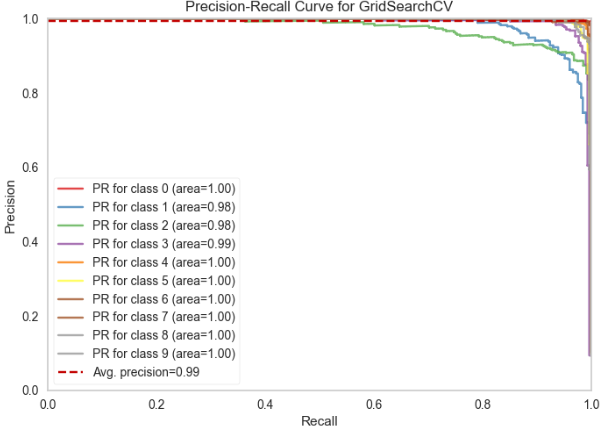

scoring parametresini önce "recall" olarak girdiğimizde bu görseldeki sonucları elde etmiştik. scoring parametresini "accuracy" olarak değiştirdiğimizde yukarıda ki sonuçları elde ettik ve çok daha iyi sonuçlar.
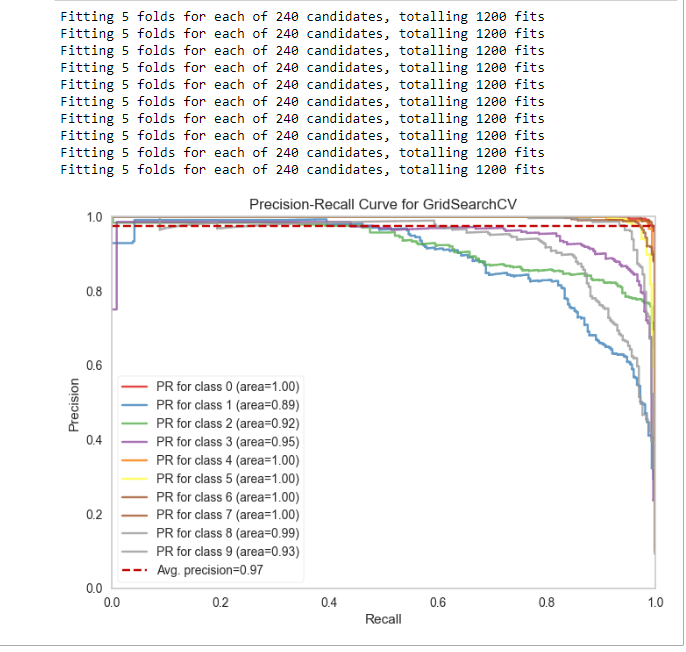

# Support Vector Machine (SVM) Classifier

### Multiclass Classification Using SVM
In its most basic type, SVM doesn’t support multiclass classification. For multiclass classification, the same principle is utilized after breaking down the multi-classification problem into smaller subproblems, all of which are binary classification problems.

The popular methods which are used to perform multi-classification on the problem statements using SVM are as follows:

👉 One vs One (OVO) approach

👉 One vs All (OVA) approach

👉 Directed Acyclic Graph (DAG) approach

source:

https://www.analyticsvidhya.com/blog/2021/05/multiclass-classification-using-svm/

https://medium.com/grabngoinfo/support-vector-machine-svm-hyperparameter-tuning-in-python-a65586289bcb

In [25]:
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn import svm, datasets


In [26]:
linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo').fit(X_train, y_train)
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo').fit(X_train, y_train)
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo').fit(X_train, y_train)
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo').fit(X_train, y_train)

In [27]:
linear_pred = linear.predict(X_test)
poly_pred = poly.predict(X_test)
rbf_pred = rbf.predict(X_test)
sig_pred = sig.predict(X_test)

In [28]:
# retrieve the accuracy and print it for all 4 kernel functions
accuracy_lin = linear.score(X_test, y_test)
accuracy_poly = poly.score(X_test, y_test)
accuracy_rbf = rbf.score(X_test, y_test)
accuracy_sig = sig.score(X_test, y_test)
print("Accuracy Linear Kernel:", accuracy_lin)
print("Accuracy Polynomial Kernel:", accuracy_poly)
print("Accuracy Radial Basis Kernel:", accuracy_rbf)
print("Accuracy Sigmoid Kernel:", accuracy_sig)


Accuracy Linear Kernel: 0.9775621588841722
Accuracy Polynomial Kernel: 0.9942389326864767
Accuracy Radial Basis Kernel: 0.10036385688295937
Accuracy Sigmoid Kernel: 0.389630078835658


In [29]:
# creating a confusion matrix
cm_lin = confusion_matrix(y_test, linear_pred)
cm_poly = confusion_matrix(y_test, poly_pred)
cm_rbf = confusion_matrix(y_test, rbf_pred)
cm_sig = confusion_matrix(y_test, sig_pred)
print("Linear Kernel:")
print(cm_lin)
print("Accuracy:", accuracy_lin)
print()
print()
print("Polynomial Kernel:")
print(cm_poly)
print("Accuracy:", accuracy_poly)
print()
print()
print("Radial Basis Kernel:")
print(cm_rbf)
print("Accuracy:", accuracy_rbf)
print()
print()
print("Sigmoid Kernel:")
print(cm_sig)
print("Accuracy:", accuracy_sig)

Linear Kernel:
[[344   0   0   0   0   0   2   0   5   0]
 [  0 326   2   1   0   0   0   1   0   1]
 [  0   5 342   0   0   0   0   2   0   0]
 [  0   3   1 304   0   0   0   1   0   0]
 [  0   2   0   0 353   0   0   2   0   0]
 [  0   2   0   2   0 310   1   0   2   4]
 [  0   0   0   0   0   0 333   0   1   0]
 [  0   1   1   1   0   0   1 332   2   0]
 [  5   0   0   0   0  13   1   1 285   0]
 [  2   1   0   4   0   1   0   0   0 295]]
Accuracy: 0.9775621588841722


Polynomial Kernel:
[[349   0   0   0   0   0   2   0   0   0]
 [  0 327   2   1   0   0   0   1   0   0]
 [  0   0 349   0   0   0   0   0   0   0]
 [  0   0   1 307   0   0   0   1   0   0]
 [  0   0   0   0 355   0   0   2   0   0]
 [  0   0   0   1   0 319   0   0   0   1]
 [  0   0   0   0   0   0 334   0   0   0]
 [  0   1   1   0   0   0   0 336   0   0]
 [  1   0   0   0   0   1   0   1 302   0]
 [  1   0   0   1   0   0   0   0   0 301]]
Accuracy: 0.9942389326864767


Radial Basis Kernel:
[[  0 351   0   0   0

## Gread Search 

In [30]:
C_range = np.logspace(-1, 1, 3)
print(f'The list of values for C are {C_range}')

The list of values for C are [ 0.1  1.  10. ]


In [31]:
gamma_range = np.logspace(-1, 1, 3)
print(f'The list of values for gamma are {gamma_range}')

The list of values for gamma are [ 0.1  1.  10. ]


In [32]:
# Define the search space
param_grid_svm = { 
    
    "C": C_range,
    "kernel": ['rbf', 'poly'],
    "gamma": gamma_range.tolist()+['scale', 'auto']
    }

scoring = ['accuracy']
# Set up the k-fold cross-validation
#kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

In [33]:
svc = SVC()

In [34]:
# Define grid search
grid_search = GridSearchCV(estimator=svc, 
                           param_grid=param_grid_svm, 
                           scoring=scoring, 
                           refit='accuracy', 
                           n_jobs=-1, 
                           cv=10, 
                           verbose=0)
# Fit grid search
grid_result = grid_search.fit(X_train, y_train)
# Print grid search summary
grid_result

GridSearchCV(cv=10, estimator=SVC(), n_jobs=-1,
             param_grid={'C': array([ 0.1,  1. , 10. ]),
                         'gamma': [0.1, 1.0, 10.0, 'scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             refit='accuracy', scoring=['accuracy'])

In [36]:
score_SVM = grid_result.best_score_  ## accuracy
score_SVM

0.9958414537348219

In [37]:
grid_result.best_params_

{'C': 10.0, 'gamma': 'scale', 'kernel': 'rbf'}

In [38]:
print("accuracy of SVM:", score_SVM)
print("accuracy of  RF:", score_rf)

accuracy of SVM: 0.9958414537348219
accuracy of  RF: 0.9821937809412999


iki sonuç arasında SVM açık ara daha başarılı sonuçlar verdiği icin SVM tercih edilmiştir.